# Face Detection

## Imports

In [42]:
import cv2
import os
import time
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import random
import dlib
import numpy as np
import pandas as pd
import logging
import seaborn as sns
from PIL import Image
import random
from IPython import display
display.clear_output()

1. The Viola-Jones Algorithm (Haar Cascades): Haar cascades are a widely recognized and widely used algorithmic approach for face detection. This method utilizes a cascade of classifiers to identify distinct facial features and accurately detect faces within images.

In [43]:
# Load the Haar cascade XML file for face detection
cascade_path = 'models/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(cascade_path)

# Directory path containing the images
directory = 'images'

# New folder to save the images with detected faces
output_folder = 'results/viola_output'
os.makedirs(output_folder, exist_ok=True)

# Initialize an empty list to store the number of faces detected in each image
viola_face_counts = []

# Start the timer
start_time = time.time()

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Load the image
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)

        # Convert the image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Perform face detection
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Count the number of faces detected
        face_count = len(faces)

        # Store the number of faces detected in the list
        viola_face_counts.append(face_count)

        # Draw rectangles around the detected faces
        for (x, y, w, h) in faces:
            cv2.rectangle(image, (x, y), (x+w, y+h), (51, 255, 255), 10)

        # Change the file extension to save as JPEG
        output_path = os.path.splitext(os.path.join(output_folder, filename))[0] + '.jpeg'
        cv2.imwrite(output_path, image)

# Stop the timer
end_time = time.time()

# Calculate the total running time
viola_time = end_time - start_time

# Print the number of faces detected in each image
print(f"Number of faces detected: {viola_face_counts}")

# Print the total running time
print(f"Total running time: {viola_time:.2f} seconds")


Number of faces detected: [12, 11, 2, 6, 4, 6, 11, 1, 8, 8, 3, 7, 1, 0, 3, 6, 11, 4, 8, 2, 8, 8, 5, 9, 2, 5, 2, 8, 4]
Total running time: 13.98 seconds


2. MTCNN (Multi-task Cascaded Convolutional Networks): MTCNN represents a state-of-the-art deep learning-based algorithm that excels in simultaneous face detection and facial landmark estimation. By employing cascaded convolutional networks, MTCNN achieves remarkable accuracy in detecting faces and precisely locating facial landmarks.

In [45]:
# Set the logging level of the mtcnn package to suppress logs
logging.getLogger('mtcnn').setLevel(logging.ERROR)
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Directory path containing the images
directory = 'images'

# New folder to save the images with detected faces
output_folder = 'results/mtcnn_output'
os.makedirs(output_folder, exist_ok=True)

# Create an instance of MTCNN
detector = MTCNN()

# Initialize empty arrays to store face counts and detection times
MTCNN_face_counts = []
detection_times = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        # Load the image
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)

        # Convert the image to RGB
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Detect faces using MTCNN
        start_time = time.time()
        faces = detector.detect_faces(image_rgb)
        end_time = time.time()
        detection_time = end_time - start_time

        # Count the number of faces detected
        face_count = len(faces)

        # Store the face count and detection time in the arrays
        MTCNN_face_counts.append(face_count)
        detection_times.append(detection_time)

        # Draw rectangles around the detected faces
        for face in faces:
            x, y, width, height = face['box']
            cv2.rectangle(image, (x, y), (x + width, y + height), (255, 51, 255), 10)

        output_path = os.path.splitext(os.path.join(output_folder, filename))[0] + '.jpeg'
        cv2.imwrite(output_path, image)

# Print the face counts and detection times for all images
print("Face counts:", MTCNN_face_counts)
#print("Detection times:", detection_times)

# Calculate and print the total running time
MTCNN_time = sum(detection_times)
print(f"Total running time: {MTCNN_time:.2f} seconds")



1/1 [==============================] - 0s 21ms/step
Face counts: [5, 6, 0, 2, 2, 2, 4, 1, 15, 3, 2, 2, 0, 1, 4, 3, 9, 7, 3, 3, 4, 4, 3, 8, 2, 2, 0, 3, 2]
Total running time: 91.77 seconds


3. dlib Face Detector: The dlib face detector is a highly regarded and powerful face detection algorithm. It is based on the combination of Histogram of Oriented Gradients (HOG) features and a linear classifier, known as a Support Vector Machine (SVM).

In [47]:
import cv2
import dlib
import os
import time
# Directory path containing the images
directory = 'images'

# New folder to save the images with detected faces
output_folder = 'results/dlib_output'
os.makedirs(output_folder, exist_ok=True)

# Create a face detector using Dlib
detector = dlib.get_frontal_face_detector()

# Initialize an empty array to store the face counts and detection times
dlib_face_counts = []
detection_times = []

# Get a list of image file paths in the directory
image_files = [filename for filename in os.listdir(directory) if filename.endswith((".jpg", ".jpeg"))]

# Start the timer for total running time
total_start_time = time.time()

# Loop through the randomly selected images
for filename in image_files:
    # Load the image
    image_path = os.path.join(directory, filename)
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Perform face detection and measure the time taken
    start_time = time.time()
    faces = detector(gray)
    end_time = time.time()
    detection_time = end_time - start_time

    # Count the number of faces detected
    face_count = len(faces)

    # Store the face count and detection time in the arrays
    dlib_face_counts.append(face_count)
    detection_times.append(detection_time)

    # Draw rectangles around the detected faces
    for face in faces:
        x, y, w, h = face.left(), face.top(), face.width(), face.height()
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 10)

    output_path = os.path.splitext(os.path.join(output_folder, filename))[0] + '.jpeg'
    cv2.imwrite(output_path, image)

# Stop the timer for total running time
total_end_time = time.time()

# Calculate the total running time
dlib_time = total_end_time - total_start_time

# Print the face counts and detection times for all images
print("Face counts:", dlib_face_counts)
#print("Detection times:", detection_times)

# Print the total running time
print(f"Total running time: {dlib_time:.2f} seconds")

Face counts: [3, 4, 0, 2, 2, 2, 2, 1, 4, 3, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1, 4, 3, 3, 0, 2, 2, 0, 3, 2]
Total running time: 24.27 seconds


4. DNN Face Detector in OpenCV: OpenCV's deep neural network (DNN) module features a dedicated pre-trained model tailored for face detection tasks. This algorithm harnesses the power of deep learning techniques to deliver exceptional accuracy in detecting faces, making it an ideal choice for robust face detection applications.

In [49]:
# Load the pre-trained face detection model
model_path = 'models/res10_300x300_ssd_iter_140000.caffemodel'
config_path = 'models/deploy.prototxt'

net = cv2.dnn.readNetFromCaffe(config_path, model_path)

input_folder = 'images'
output_folder = 'results/dnn_output'
os.makedirs(output_folder, exist_ok=True)

total_faces_detected = 0
total_processing_time = 0
DNN_faces_per_image = []

for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):
        image_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, filename)

        # Load the input image
        image = cv2.imread(image_path)

        # Preprocess the input image
        blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

        # Perform the face detection
        net.setInput(blob)
        start_time = time.time()
        detections = net.forward()
        end_time = time.time()
        processing_time = end_time - start_time
        total_processing_time += processing_time

        # Process the face detections
        num_faces = 0
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.5:
                num_faces += 1
                box = detections[0, 0, i, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
                (startX, startY, endX, endY) = box.astype(int)

                cv2.rectangle(image, (startX, startY), (endX, endY), (255, 204, 204), 10)

        total_faces_detected += num_faces
        DNN_faces_per_image.append(num_faces)

        # Save the processed image
        output_path = os.path.splitext(os.path.join(output_folder, filename))[0] + '.jpeg'
        cv2.imwrite(output_path, image)

print(f"Total faces detected: {DNN_faces_per_image}")
print(f"Total processing time: {total_processing_time:.2f} seconds.")


Total faces detected: [2, 4, 0, 2, 2, 2, 3, 1, 4, 3, 2, 2, 0, 0, 0, 2, 2, 2, 2, 3, 4, 2, 3, 0, 2, 2, 1, 3, 2]
Total processing time: 0.63 seconds.


## Comparing models

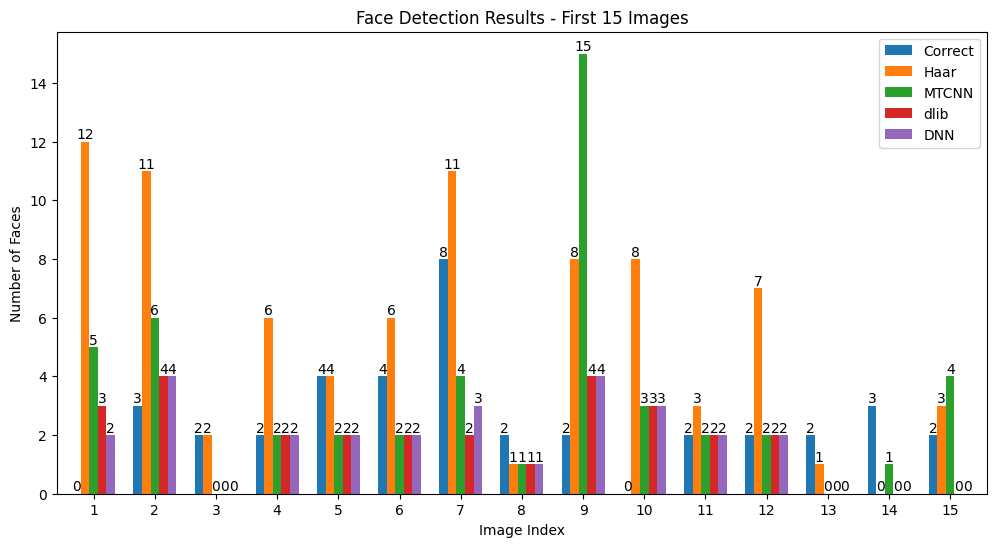

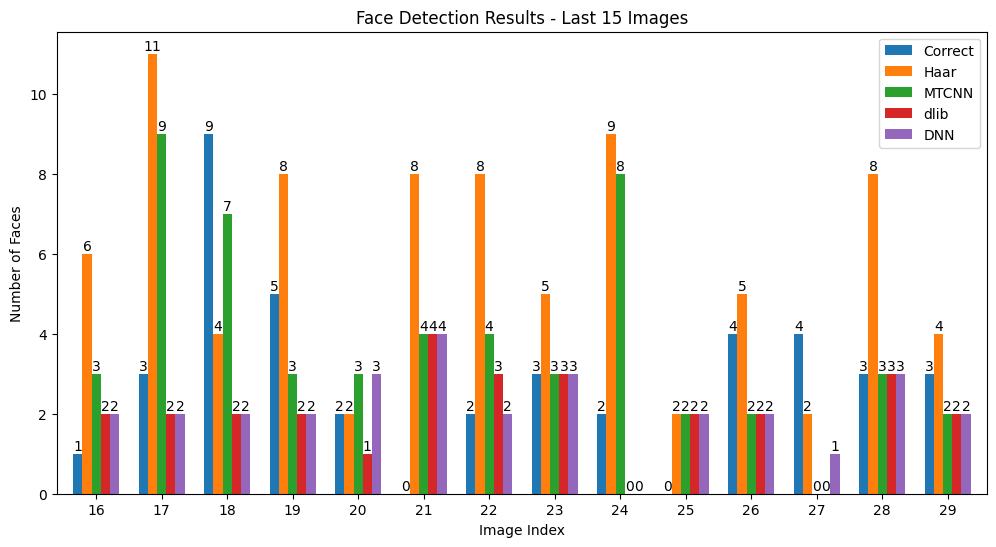

In [50]:
# Define a custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Real number of faces extracted from the text file
real_numfaces = np.loadtxt("number_faces.txt", dtype="int")

# Splitting the data into two dataframes: first 15 images and last 15 images
df1 = pd.DataFrame(
    {
        "Correct": real_numfaces[0:15],
        "Haar": viola_face_counts[0:15],
        "MTCNN": MTCNN_face_counts[0:15],
        "dlib": dlib_face_counts[0:15],
        "DNN": DNN_faces_per_image[0:15]
    }
)

df2 = pd.DataFrame(
    {
        "Correct": real_numfaces[15:],
        "Haar": viola_face_counts[15:],
        "MTCNN": MTCNN_face_counts[15:],
        "dlib": dlib_face_counts[15:],
        "DNN": DNN_faces_per_image[15:]
    }
)

# Set the custom color palette
sns.set_palette(colors)

# Plotting the first 15 images
plt.figure(figsize=(12, 6))
ax = df1.plot(kind='bar', ax=plt.gca(), width=0.7)  # Increase width for clarity
plt.xlabel('Image Index')
plt.ylabel('Number of Faces')
plt.title('Face Detection Results - First 15 Images')
plt.legend(loc='upper right')
ax.set_xticklabels(range(1, len(df1) + 1), rotation=0)

# Display the values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

# Plotting the last 15 images
plt.figure(figsize=(12, 6))
ax = df2.plot(kind='bar', ax=plt.gca(), width=0.7)  # Increase width for clarity
plt.xlabel('Image Index')
plt.ylabel('Number of Faces')
plt.title('Face Detection Results - Last 15 Images')
plt.legend(loc='upper right')
ax.set_xticklabels(range(16, len(df2) + 16), rotation=0)

# Display the values on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()
plt.show()


## Accuracy

In [58]:
import numpy as np

total = np.sum(np.loadtxt("number_faces.txt", dtype="int"))
viola_accuracy = np.sum(viola_face_counts) / total 
MTCNN_accuracy = np.sum(MTCNN_face_counts) / total 
dlib_accuracy = np.sum(dlib_face_counts) / total 
DNN_accuracy = np.sum(DNN_faces_per_image) / total 

# Print the table
print("--- Accuracies ---")
print("{:<10s} {:<10s}".format("Method", "Accuracy"))
print("---------------------")
print("{:<10s} {:.4f}".format("Viola", viola_accuracy))
print("{:<10s} {:.4f}".format("MTCNN", MTCNN_accuracy))
print("{:<10s} {:.4f}".format("dlib", dlib_accuracy))
print("{:<10s} {:.4f}".format("DNN", DNN_accuracy))

--- Accuracies ---
Method     Accuracy  
---------------------
Viola      2.0886
MTCNN      1.2911
dlib       0.6962
DNN        0.7215


## Speed

In [57]:
# Print the table
print("---------------------")
print("{:<10s} {:<10s}".format("Method", "Speed (ms)"))
print("---------------------")
print("{:<10s} {:.4f}".format("Viola", viola_time))
print("{:<10s} {:.4f}".format("MTCNN", MTCNN_time))
print("{:<10s} {:.4f}".format("dlib", dlib_time))
print("{:<10s} {:.4f}".format("DNN", total_processing_time))

---------------------
Method     Speed (ms)
---------------------
Viola      13.9764
MTCNN      91.7733
dvlib      24.2669
DNN        0.6269


## Images with face detected

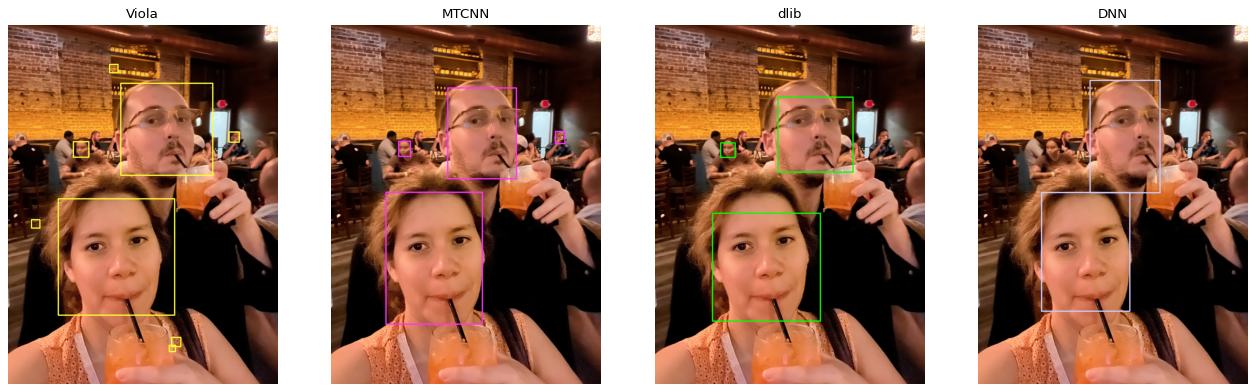

In [54]:
def showImagesHorizontally(list_of_files):
    fig, axes = plt.subplots(1, len(list_of_files), figsize=(20, 20), dpi=80)
    
    for ax, file, label in zip(axes, list_of_files, labels):
        image = Image.open(file)
        ax.imshow(image)
        ax.set_axis_off()
        ax.set_title(label)

# Generate a random integer within the specified range
r = random.randint(0, 30)
image_files = [
    "results/viola_output/"+str(r)+".jpeg",
    "results/mtcnn_output/"+str(r)+".jpeg",
    "results/dlib_output/"+str(r)+".jpeg",
    "results/dnn_output/"+str(r)+".jpeg"
]

# List of labels for each image
labels = ["Viola", "MTCNN", "dlib", "DNN"]

showImagesHorizontally(image_files)
